<a href="https://colab.research.google.com/github/Dawudis/Democrat-vs-Republican-Tweets-Sentiment-and-Subjectivity/blob/main/Democrat_vs_Republican_Tweets_Data_Visualization_(Pie_Chart_Edition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

Democrat and Republican Tweet Dataset from Kaggle: https://www.kaggle.com/datasets/kapastor/democratvsrepublicantweets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ExtractedTweets.csv to ExtractedTweets.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ExtractedTweets.csv')
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


Split Dataset Into Tweets Coming from Democrat and Republican Parties

In [ ]:
democrat = df[df['Party'].str.contains("Democrat")]
democrat.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [ ]:
democrat.shape

(42068, 3)

In [ ]:
republican = df[df['Party'].str.contains("Republican")]
republican.head()

,Party,Handle,Tweet
42068,Republican,RepRalphNorman,"It's #WastefulWednesday! \n\nToday, I introduc..."
42069,Republican,RepRalphNorman,Today we honored all the heroic men &amp; wome...
42070,Republican,RepRalphNorman,"RT @CongressmanRaja: Last week, @RepRalphNorma..."
42071,Republican,RepRalphNorman,RT @TegaCayPD: Chief Parker was thankful to re...
42072,Republican,RepRalphNorman,I visited the SC Highway Patrol to bring them ...


In [ ]:
republican.shape

(44392, 3)

Keep Equal Number of Rows for Both Datasets

We Want to Take a Small Amount for Faster Runtime (This is Customizable)

In [ ]:
democrat = democrat[0:6000]

In [ ]:
republican = republican[0:6000]

# **Sentiment Analysis**

Install Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
import torch

In [ ]:
!pip install transformers 
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Defining Sentiment Score Function

In [ ]:
def sentiment_score(articles):
    tokens = tokenizer.encode(articles, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

Apply Sentiment Analysis on Democrat Dataset and Republican Dataset

In [ ]:
democrat['sentiment'] = democrat['Tweet'].apply(lambda x: sentiment_score(x[:512]))
democrat.head()

,Party,Handle,Tweet,sentiment
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",5
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,5
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,5
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1


In [ ]:
republican['sentiment'] = republican['Tweet'].apply(lambda x: sentiment_score(x[:512]))
republican.head()

,Party,Handle,Tweet,sentiment
42068,Republican,RepRalphNorman,"It's #WastefulWednesday! \n\nToday, I introduc...",1
42069,Republican,RepRalphNorman,Today we honored all the heroic men &amp; wome...,5
42070,Republican,RepRalphNorman,"RT @CongressmanRaja: Last week, @RepRalphNorma...",5
42071,Republican,RepRalphNorman,RT @TegaCayPD: Chief Parker was thankful to re...,5
42072,Republican,RepRalphNorman,I visited the SC Highway Patrol to bring them ...,5


# **Subjectivity**

In [ ]:
from textblob import TextBlob

Define Function for Subjectivity Extraction

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

Apply Function to Both Datasets

In [ ]:
democrat['subjectivity'] = democrat['Tweet'].apply(getSubjectivity)

In [ ]:
democrat.head()

,Party,Handle,Tweet,sentiment,subjectivity
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",5,0.7
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,5,0.0
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,1,0.3
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,5,0.2
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,1,0.0


In [ ]:
republican['subjectivity'] = republican['Tweet'].apply(getSubjectivity)

In [ ]:
republican.head()

,Party,Handle,Tweet,sentiment,subjectivity
42068,Republican,RepRalphNorman,"It's #WastefulWednesday! \n\nToday, I introduc...",1,0.000000
42069,Republican,RepRalphNorman,Today we honored all the heroic men &amp; wome...,5,0.900000
42070,Republican,RepRalphNorman,"RT @CongressmanRaja: Last week, @RepRalphNorma...",5,0.133333
42071,Republican,RepRalphNorman,RT @TegaCayPD: Chief Parker was thankful to re...,5,0.000000
42072,Republican,RepRalphNorman,I visited the SC Highway Patrol to bring them ...,5,0.000000


# **Configuring the Visualization**

# Sentiment

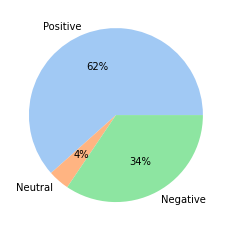

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [len(democrat[(democrat['sentiment'] > 3)]), len(democrat[(democrat['sentiment'] == 3)]), len(democrat[(democrat['sentiment'] < 3)])]
labels = ['Positive', 'Neutral', 'Negative']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

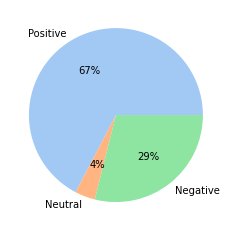

In [ ]:
#define data
data1 = [len(republican[(republican['sentiment'] > 3)]), len(republican[(republican['sentiment'] == 3)]), len(republican[(republican['sentiment'] < 3)])]

#create pie chart
plt.pie(data1, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Subjectivity

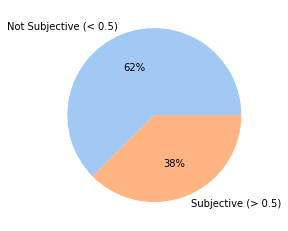

In [ ]:
#define data
data2 = [len(democrat[(democrat['subjectivity'] < 0.50)]), len(democrat[(democrat['subjectivity'] >= 0.50)])]
labels1 = ['Not Subjective (< 0.5)', 'Subjective (> 0.5)'] 

#create pie chart
plt.pie(data2, labels = labels1, colors = colors, autopct='%.0f%%')
plt.show()

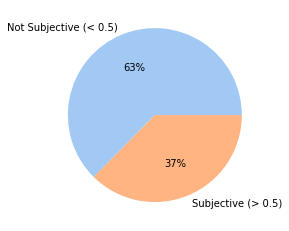

In [ ]:
#define data
data3 = [len(republican[(republican['subjectivity'] < 0.50)]), len(republican[(republican['subjectivity'] >= 0.50)])] 

#create pie chart
plt.pie(data3, labels = labels1, colors = colors, autopct='%.0f%%')
plt.show()